In [30]:
# The script gets the PMT paddles miny values for interesting events from the
# root files contained in ubdaq-prod-ws01.fnal.gov:/home/gahs/torscopemon.
import ROOT
import array
import math
import os
from IPython.display import Image as Plot
ROOT.gROOT.SetBatch(1)

# Useful function to avoid root-caused memory leaks in ipynb files
def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

# Good fit
g_xres = 950
g_yres = 425

# Good res
#g_xres = 1024
#g_yres = 768

# Path to input/output and variables
rootDir = "/home/sdporzio/HighVoltageTask/TorScopeMon/GAHS/RootFiles/"
miny1 = array.array("f",[])
miny2 = array.array("f",[])
miny3 = array.array("f",[])
miny4 = array.array("f",[])
avgy1 = array.array("f",[])
avgy2 = array.array("f",[])
avgy3 = array.array("f",[])
avgy4 = array.array("f",[])
maxy1 = array.array("f",[])
maxy2 = array.array("f",[])
maxy3 = array.array("f",[])
maxy4 = array.array("f",[])

totEntries = 0
# Loop through each file in rootDir
for filename in os.listdir(rootDir):
    # Open TTree
    fRoot = ROOT.TFile(rootDir+filename,"READ")
    tree = fRoot.torscope_tree
    # Loop through each event and store values
    nEntries = tree.GetEntries()
    totEntries = totEntries + nEntries
    for eventNumber in range(nEntries):
        tree.GetEntry(eventNumber)
        miny1.append(tree.miny[0])
        miny2.append(tree.miny[1])
        miny3.append(tree.miny[2])
        miny4.append(tree.miny[3])
        avgy1.append(tree.avgy[0])
        avgy2.append(tree.avgy[1])
        avgy3.append(tree.avgy[2])
        avgy4.append(tree.avgy[3])
        maxy1.append(tree.maxy[0])
        maxy2.append(tree.maxy[1])
        maxy3.append(tree.maxy[2])
        maxy4.append(tree.maxy[3])
print "Done! (%i entries)" %(totEntries)

Done! (19396 entries)


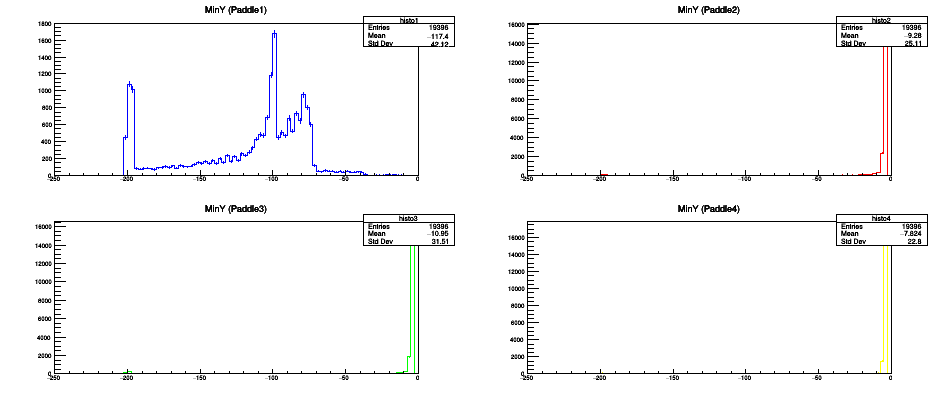

In [27]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("histo1","MinY (Paddle1)",100,-250,0)
h2 = ROOT.TH1D("histo2","MinY (Paddle2)",100,-250,0)
h3 = ROOT.TH1D("histo3","MinY (Paddle3)",100,-250,0)
h4 = ROOT.TH1D("histo4","MinY (Paddle4)",100,-250,0)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kYellow)

for i in range(totEntries):
    h1.Fill(miny1[i])
    h2.Fill(miny2[i])
    h3.Fill(miny3[i])
    h4.Fill(miny4[i])

c1.Divide(2,2)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")
c1.cd(4)
h4.Draw("EH")

c1.SaveAs("OutVariables/histo1.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
destruct(h4)
Plot("OutVariables/histo1.png")

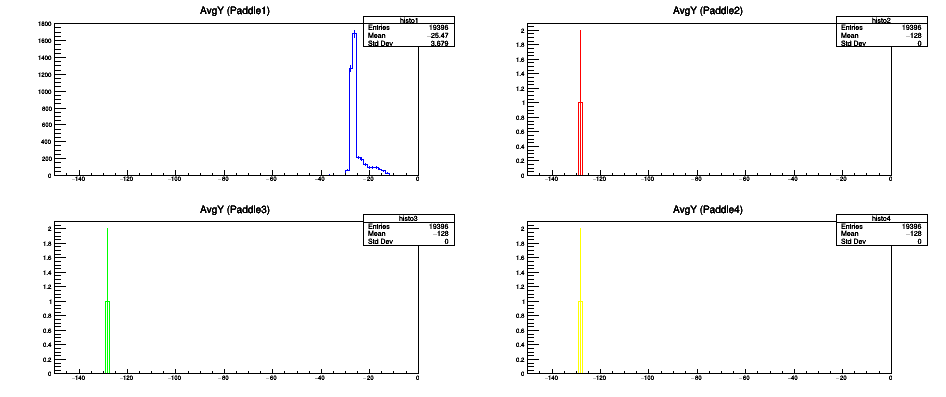

In [33]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("histo1","AvgY (Paddle1)",100,0,0)
h2 = ROOT.TH1D("histo2","AvgY (Paddle2)",100,0,0)
h3 = ROOT.TH1D("histo3","AvgY (Paddle3)",100,0,0)
h4 = ROOT.TH1D("histo4","AvgY (Paddle4)",100,0,0)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kYellow)

for i in range(totEntries):
    h1.Fill(avgy1[i])
    h2.Fill(avgy2[i])
    h3.Fill(avgy3[i])
    h4.Fill(avgy4[i])

c1.Divide(2,2)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")
c1.cd(4)
h4.Draw("EH")

c1.SaveAs("OutVariables/hi0.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
destruct(h4)
Plot("OutVariables/histo2.png")

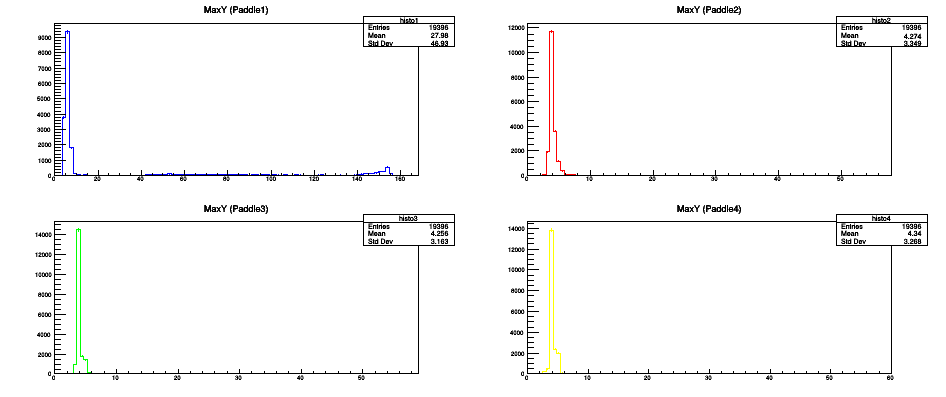

In [32]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("histo1","MaxY (Paddle1)",100,0,0)
h2 = ROOT.TH1D("histo2","MaxY (Paddle2)",100,0,0)
h3 = ROOT.TH1D("histo3","MaxY (Paddle3)",100,0,0)
h4 = ROOT.TH1D("histo4","MaxY (Paddle4)",100,0,0)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kYellow)

for i in range(totEntries):
    h1.Fill(maxy1[i])
    h2.Fill(maxy2[i])
    h3.Fill(maxy3[i])
    h4.Fill(maxy4[i])

c1.Divide(2,2)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")
c1.cd(4)
h4.Draw("EH")

c1.SaveAs("OutVariables/histo3.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
destruct(h4)
Plot("OutVariables/histo3.png")

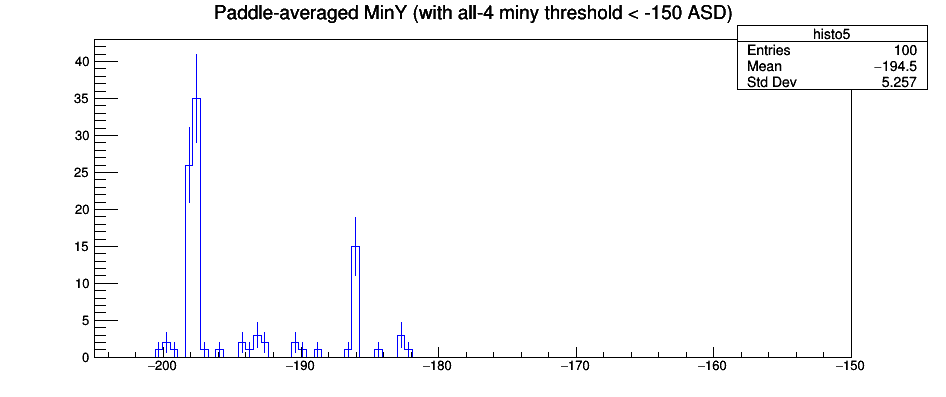

In [63]:
cuty = -150

c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
title = "Paddle-averaged MinY (with all-4 miny threshold < %i ASD)" %(cuty)
h1 = ROOT.TH1D("histo1","MinY (Paddle1)",100,-205,cuty)
h2 = ROOT.TH1D("histo2","MinY (Paddle2)",100,-205,cuty)
h3 = ROOT.TH1D("histo3","MinY (Paddle3)",100,-205,cuty)
h4 = ROOT.TH1D("histo4","MinY (Paddle4)",100,-205,cuty)
h5 = ROOT.TH1D("histo5",title,100,-205,cuty)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kYellow)
h5.SetLineColor(ROOT.kBlue)
h5.SetLineWidth(1)

for i in range(totEntries):
    if miny1[i] < cuty and miny2[i] < cuty and miny3[i] < cuty and miny4[i] < cuty:
        h1.Fill(miny1[i])
        h2.Fill(miny2[i])
        h3.Fill(miny3[i])
        h4.Fill(miny4[i])
        h5.Fill((miny1[i]+miny2[i]+miny3[i]+miny4[i])/4.)

h5.Draw("EH")
#h1.Draw("EHSAME")
#h2.Draw("EHSAME")
#h3.Draw("EHSAME")
#h4.Draw("EHSAME")
#h5.Draw("EHSAME")

c1.SaveAs("OutVariables/histo4.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
destruct(h4)
destruct(h5)
Plot("OutVariables/histo4.png")